In [1]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

raw_data = pd.read_csv("/Users/annaevseeva/Downloads/MARL Dynare/McCandless_2008_Chapter_9.csv")
raw_data.head()

,w,r,c,k,h,m,p,g,lambda,y
0,2.356943,0.034266,0.913367,12.646573,0.327522,0.918659,1.005760,1.0,0.987752,1.206043
1,2.363745,0.034892,0.916003,12.640113,0.331873,0.918659,1.002891,1.0,0.996002,1.225707
2,2.358654,0.034637,0.914030,12.626179,0.329996,0.918659,1.005038,1.0,0.992012,1.216100
3,2.363339,0.035044,0.915846,12.623767,0.332843,0.918659,1.003062,1.0,0.997458,1.229088
4,2.369678,0.035453,0.918302,12.633102,0.335770,0.918659,1.000388,1.0,1.003359,1.243232


In [3]:
print(raw_data.columns.to_list())

['w', 'r', 'c', 'k', 'h', 'm', 'p', 'g', 'lambda', 'y']


In [5]:
column_mapping = {
    "w": "Real Wage",
    "r": "Real Return On Capital",
    "c": "Real Consumption",
    "k": "Capital Stock",
    "h": "Hours Worked",
    "m": "Money Stock",
    "p": "Price Level",
    "g": "Growth Rate Of Money Stock",
    "lambda": "Total Factor Productivity",
    "y": "Real Output"
}

# Предположим, что df — это ваш датафрейм
raw_data = raw_data.rename(columns=column_mapping)

# Вывод обновленного датафрейма
print(raw_data.head())
idx = raw_data.columns.get_loc('Real Consumption')
print(idx)

   Real Wage  Real Return On Capital  Real Consumption  Capital Stock  \
0   2.356943                0.034266          0.913367      12.646573   
1   2.363745                0.034892          0.916003      12.640113   
2   2.358654                0.034637          0.914030      12.626179   
3   2.363339                0.035044          0.915846      12.623767   
4   2.369678                0.035453          0.918302      12.633102   

   Hours Worked  Money Stock  Price Level  Growth Rate Of Money Stock  \
0      0.327522     0.918659     1.005760                         1.0   
1      0.331873     0.918659     1.002891                         1.0   
2      0.329996     0.918659     1.005038                         1.0   
3      0.332843     0.918659     1.003062                         1.0   
4      0.335770     0.918659     1.000388                         1.0   

   Total Factor Productivity  Real Output  
0                   0.987752     1.206043  
1                   0.996002     1

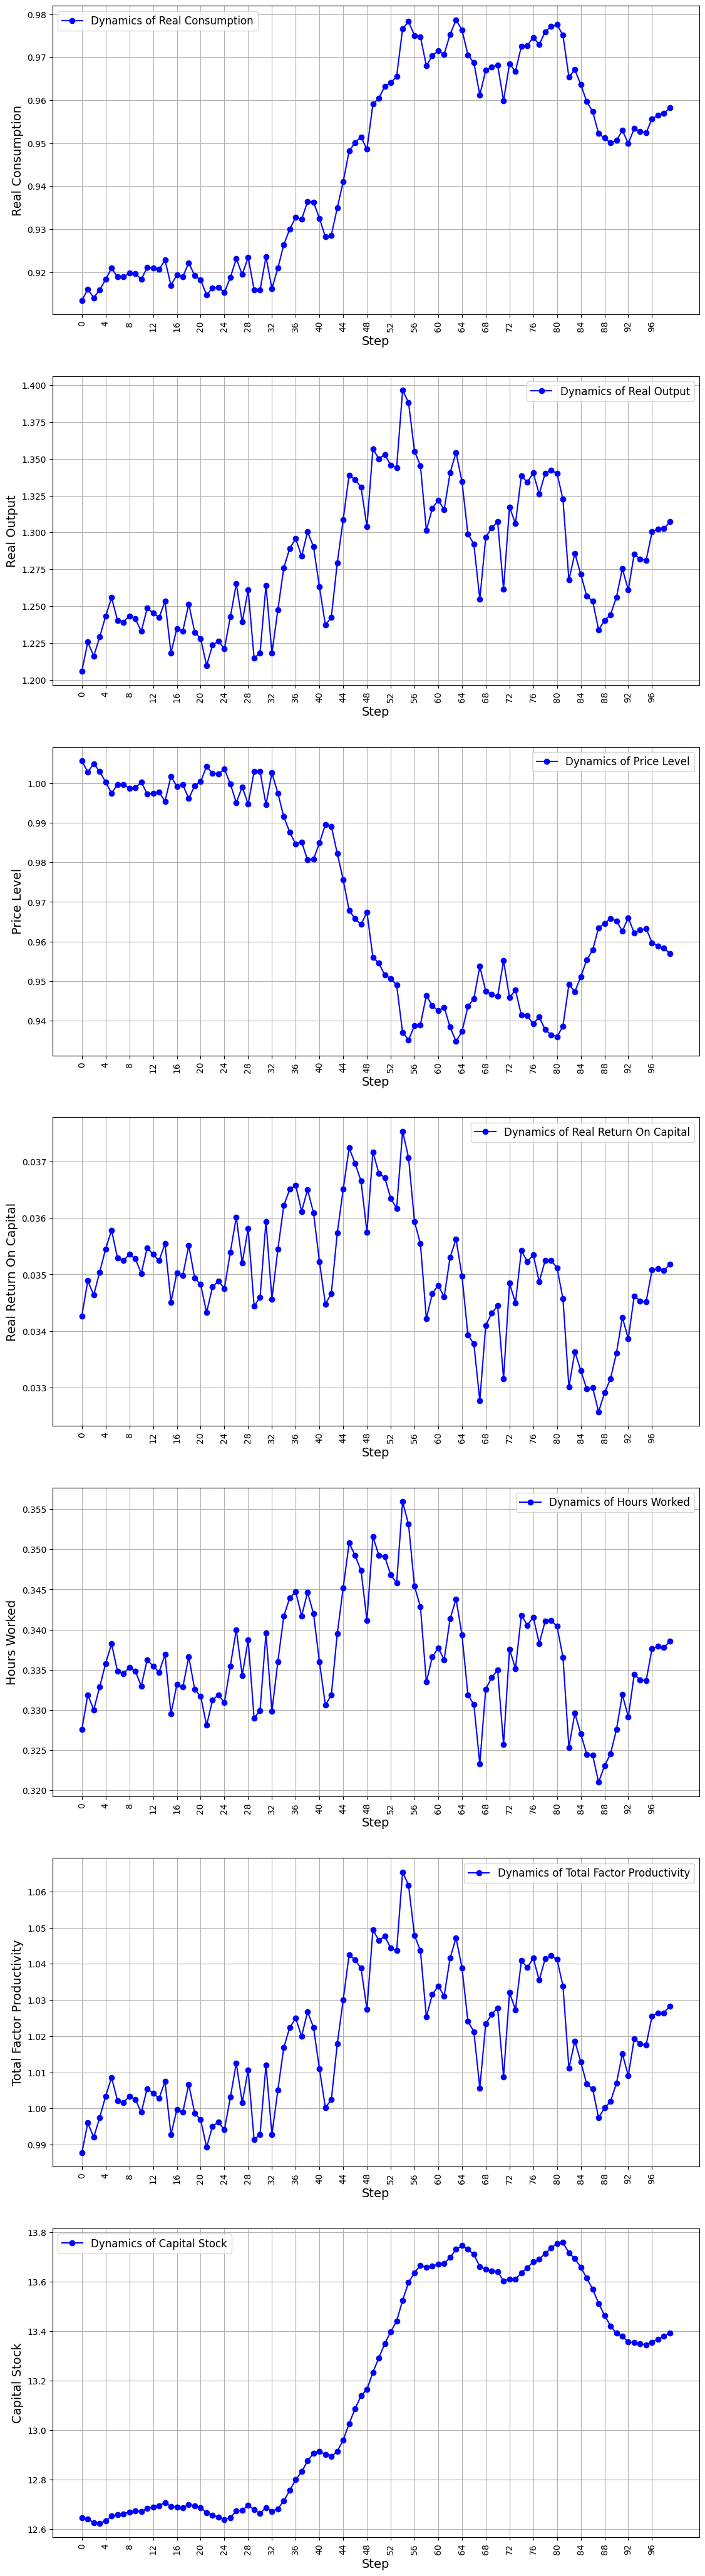

In [9]:
import matplotlib.pyplot as plt
import numpy as np

columns = ["Real Consumption", "Real Output", "Price Level", "Real Return On Capital", "Hours Worked", "Total Factor Productivity", "Capital Stock"]
# columns = ["y", "c", "k", "invest"]


fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(13.33, 7.5 * len(columns)))

for idx, column in enumerate(columns):
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    
    ax.legend(fontsize=12)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel(f"{column}", fontsize=14)
    ax.set_xticks(steps[::4])
    # ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)
